## Homework 2: Data structures and data cleaning

In this homework you will have to apply the knowledge you have learned about tidy data from reading Wickham (2014). You will have to identify problems with the organization of example datasets using the terms introduced in Wickham. You will also have to tidy a dataset, and perform some basic cleaning operations. 

Before you begin, you will need to have completed the following requirements:
- Read Wickham (2014)
- If you haven't worked with the tidyverse package before, you need to install it with the `install.packages('tidyverse')` command
- Consult Tutorial 2, which explains the basic tidyverse commands for processing data: https://github.com/venpopov/DataSciencePsychUZH/blob/main/Tutorials/Tutorial02_Data_processing_with_R_and_tidyverse.ipynb

*Copy this notebook, the folder `data` and the folder `figures` in your repository, and type in your responses and/or code in the corresponding cells. Your homework will be scored based on the total number of points (30 total possible).*

Clarification: to copy the relevant files into your repository, you first need to download them to your computer. You can do that one of two ways. First, you can open a terminal and type `git clone https://github.com/venpopov/DataSciencePsychUZH`. This will copy the entire class repository on your local computer. Then you can locate the homework2 notebook, and the data/figures folders. Then you can copy and paste them into your own repository.

Alternatively, you can directly download all files from the repository by going to the main repository page on your browser and clicking on `Code > Download ZIP` as shown in the image below. This will download all repository files into a ZIP archive on your computer. Extract the files from the archive into a new folder. Then copy and paste the homework2 notebook, and the data/figures folders into your repository.

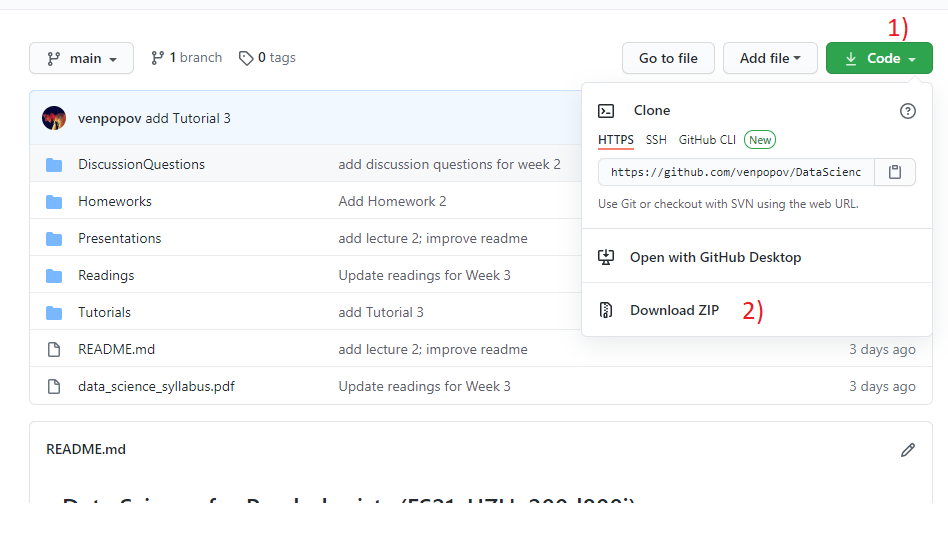


### 1. Identifying non-tidy datasets



#### 1.1 Problem 1
The dataset below shows demographic information, IQ and college grade point average for several students

In [40]:
install.packages('dplyr')
library(dplyr)


The downloaded binary packages are in
	/var/folders/9q/3ff9hz312fq3ky69gmdh6fxc0000gn/T//RtmpNlD06z/downloaded_packages


In [41]:
install.packages('tidyverse')
library(tidyverse)


The downloaded binary packages are in
	/var/folders/9q/3ff9hz312fq3ky69gmdh6fxc0000gn/T//RtmpNlD06z/downloaded_packages


In [42]:
iq_grade <- read.csv('/Users/charlotte/Documents/GitHub/DataSciencePsychUZH/Homeworks/data/iq_grade.csv')
iq_grade

subject_id,demographic_info,verbal_IQ,GPA
<int>,<chr>,<int>,<dbl>
101,"male, 23",105,3.9
102,"male, 19",121,3.2
103,"female, 27",123,3.4
104,"male, 21",97,2.8
105,"female, 21",93,2.9
106,"female, 25",135,3.8


This dataset is not in a tidy format. Why? Which of the five most common problems described by Wickhams is this an example of? Edit this cell and replace the text below with your response **(1 point)**:

> There are multiple variables stored in the column "demographic_info":  sex and age

What would you have to do to make this dataset in tidy format? **(1 point)**
> I have to to split the column "demographic_info" into two variables: sex and age.

Write code in the cell below to transform the `iq_grades` table into tidy format 

(hint: use the separate() command from the tidyverse package - see Tutorial 2; **3 points**): 

In [43]:
dat <- iq_grade  %>% 
    separate(demographic_info, into=c('sex', 'age')) 
head(dat)

,subject_id,sex,age,verbal_IQ,GPA
,<int>,<chr>,<chr>,<int>,<dbl>
1,101,male,23,105,3.9
2,102,male,19,121,3.2
3,103,female,27,123,3.4
4,104,male,21,97,2.8
5,105,female,21,93,2.9
6,106,female,25,135,3.8


#### 1.2 Problem 2
The dataset below shows statistics about violent crime rates by US state. The numbers represent frequency per 100,000 people. 

In [44]:
suppressMessages(library(tidyverse))

data("USArrests")
USArrests <- select(USArrests, -UrbanPop)
head(USArrests)

,Murder,Assault,Rape
,<dbl>,<int>,<dbl>
Alabama,13.2,236,21.2
Alaska,10.0,263,44.5
Arizona,8.1,294,31.0
Arkansas,8.8,190,19.5
California,9.0,276,40.6
Colorado,7.9,204,38.7


This dataset is not in a tidy format. Why? Which of the five most common problems described by Wickhams is this an example of? Edit this cell and replace the text below with your response **(1 point)**:

> The variables are stored in both rows and columns  in order to achieve tidy data, the states are variables and should be put into a column, not a row

What would you have to do to make this dataset in tidy format? **(1 point)**
> in order to achieve tidy data, the states are variables and should be put into a column, not a row

Write code in the cell below to transform the `USArrests` table into tidy format 

(hint: use the gather() command from the tidyverse package - see Tutorial 2; **3 points**): 

In [45]:
USArrests_State <- USArrests
USArrests_State$State <- row.names(USArrests_State)
head(USArrests_State)

,Murder,Assault,Rape,State
,<dbl>,<int>,<dbl>,<chr>
Alabama,13.2,236,21.2,Alabama
Alaska,10.0,263,44.5,Alaska
Arizona,8.1,294,31.0,Arizona
Arkansas,8.8,190,19.5,Arkansas
California,9.0,276,40.6,California
Colorado,7.9,204,38.7,Colorado


In [46]:
USArrests_Crime <- USArrests_State %>%
  gather(Crime, Incideces,-State)
head(USArrests_Crime)
tail(USArrests_Crime)

,State,Crime,Incideces
,<chr>,<chr>,<dbl>
1,Alabama,Murder,13.2
2,Alaska,Murder,10.0
3,Arizona,Murder,8.1
4,Arkansas,Murder,8.8
5,California,Murder,9.0
6,Colorado,Murder,7.9


,State,Crime,Incideces
,<chr>,<chr>,<dbl>
145,Vermont,Rape,11.2
146,Virginia,Rape,20.7
147,Washington,Rape,26.2
148,West Virginia,Rape,9.3
149,Wisconsin,Rape,10.8
150,Wyoming,Rape,15.6


#### 1.3 Problem 3

The three tables below give the measurements in centimeters of the variables sepal length, sepal width, petal length and petal width, respectively, for 50 flowers from each of 3 species of iris flowers. The species are setosa, versicolor, and virginica.

In [47]:
setosa <- read.csv('/Users/charlotte/Documents/GitHub/DataSciencePsychUZH/Homeworks/data/setosa.csv')
virginica <- read.csv('/Users/charlotte/Documents/GitHub/DataSciencePsychUZH/Homeworks/data/virginica.csv')
versicolor <- read.csv('/Users/charlotte/Documents/GitHub/DataSciencePsychUZH/Homeworks/data/versicolor.csv')

head(setosa)
head(virginica)
head(versicolor)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.3,3.3,6.0,2.5
2,5.8,2.7,5.1,1.9
3,7.1,3.0,5.9,2.1
4,6.3,2.9,5.6,1.8
5,6.5,3.0,5.8,2.2
6,7.6,3.0,6.6,2.1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,7.0,3.2,4.7,1.4
2,6.4,3.2,4.5,1.5
3,6.9,3.1,4.9,1.5
4,5.5,2.3,4.0,1.3
5,6.5,2.8,4.6,1.5
6,5.7,2.8,4.5,1.3


These tables are not in tidy format. Why? Which of the five most common problems described by Wickhams is this an example of? Edit this cell and replace the text below with your response **(1 point)**:
> There is the same type of observational unit in all three tables (all variables are the same in all three datasets). 

What would you have to do to make this dataset in tidy format? **(1 point)**
> Combine all tables into a single table.

Write code in the cell below to transform the `setosa`, `virginica` and `versicolor` tables into tidy format 

(hint: use the `bind_rows()` command from the tidyverse package; remember to include information about the species in tidy dataset; **3 points**): 

In [48]:
setosa$iris<- "setosa"
virginica$iris<-"virginica"
versicolor$iris<-"versicolor"

str(setosa)
str(virginica)
str(versicolor)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ iris        : chr  "setosa" "setosa" "setosa" "setosa" ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 ...
 $ Sepal.Width : num  3.3 2.7 3 2.9 3 3 2.5 2.9 2.5 3.6 ...
 $ Petal.Length: num  6 5.1 5.9 5.6 5.8 6.6 4.5 6.3 5.8 6.1 ...
 $ Petal.Width : num  2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8 1.8 2.5 ...
 $ iris        : chr  "virginica" "virginica" "virginica" "virginica" ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1

In [49]:
iris<-rbind(setosa,virginica,versicolor)
head(iris)
tail(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,iris
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,iris
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
145,5.6,2.7,4.2,1.3,versicolor
146,5.7,3.0,4.2,1.2,versicolor
147,5.7,2.9,4.2,1.3,versicolor
148,6.2,2.9,4.3,1.3,versicolor
149,5.1,2.5,3.0,1.1,versicolor
150,5.7,2.8,4.1,1.3,versicolor


### 2. Putting it all together

The files `basel_weather_2018.csv`, `basel_weather_2019.csv`, `basel_weather_2020.csv` in the folder `data` contain detailed information about the minimum, mean and maximum temperature in Basel, Switzerland for every hour of every day of the last three years.

The datasets have multiple structural issues. Combine your knowledge from the previous 3 problems to transform these datasets into a tidy format. The tidy format should allow you at the end to produce two plots:
1. average mean temperature as a function of a time of day
2. average maximum temperature as a function of month

When you are done, you should be able to produce the following two plots:

![max_temperature_plot](figures/basel_temp_by_month.png)
![mean_temperature_plot](figures/basel_temp_by_time_of_day.png)

First load the three dataset into three separate variables **(1 point)**:

In [50]:
weather2018<-read.csv('/Users/charlotte/Documents/GitHub/DataSciencePsychUZH/Homeworks/data/basel_weather_2018.csv')
weather2019<-read.csv('/Users/charlotte/Documents/GitHub/DataSciencePsychUZH/Homeworks/data/basel_weather_2019.csv')
weather2020<-read.csv('/Users/charlotte/Documents/GitHub/DataSciencePsychUZH/Homeworks/data/basel_weather_2020.csv')

Use the `head()` command to take a look at the first few rows of each dataset **(1 point)**:

In [51]:
head(weather2018)
head(weather2019)
head(weather2020)

nrow(weather2018)
nrow(weather2019)
nrow(weather2020)

,timestamp,temperature_type,temperature
,<chr>,<chr>,<dbl>
1,20180101T0000,temperature_mean,10.500529
2,20180101T0000,temperature_min,7.500529
3,20180101T0000,temperature_max,15.500529
4,20180101T0100,temperature_mean,9.790529
5,20180101T0100,temperature_min,5.790529
6,20180101T0100,temperature_max,13.790529


,timestamp,temperature_type,temperature
,<chr>,<chr>,<dbl>
1,20190101T0000,temperature_mean,5.0505285
2,20190101T0000,temperature_min,0.0505285
3,20190101T0000,temperature_max,9.0505285
4,20190101T0100,temperature_mean,4.9005284
5,20190101T0100,temperature_min,2.9005284
6,20190101T0100,temperature_max,8.9005284


,timestamp,temperature_type,temperature
,<chr>,<chr>,<dbl>
1,20200101T0000,temperature_mean,1.4905287
2,20200101T0000,temperature_min,0.4905287
3,20200101T0000,temperature_max,3.4905287
4,20200101T0100,temperature_mean,1.6905286
5,20200101T0100,temperature_min,0.6905286
6,20200101T0100,temperature_max,6.6905286


[1] 26280

[1] 26280

[1] 26352

Use the `bind_rows()` command to combine the three datasets into one **(1 point)**:

In [52]:
weatherALL<-rbind(weather2018, weather2019, weather2020)
nrow(weatherALL)
summary(weatherALL)


[1] 78912

  timestamp         temperature_type    temperature     
 Length:78912       Length:78912       Min.   :-12.649  
 Class :character   Class :character   1st Qu.:  6.751  
 Mode  :character   Mode  :character   Median : 12.711  
                                       Mean   : 13.073  
                                       3rd Qu.: 19.111  
                                       Max.   : 40.381  

Use the `spread()` command to transform the dataset such that the mean, maximum, and minimum temperatures are in separate columns **(2 points)**:

In [53]:
weather_temp<-weatherALL %>% 
spread(key = temperature_type, value = temperature)
summary(weather_temp)

  timestamp         temperature_max  temperature_mean temperature_min  
 Length:26304       Min.   :-6.829   Min.   :-8.649   Min.   :-12.649  
 Class :character   1st Qu.: 9.821   1st Qu.: 6.851   1st Qu.:  3.828  
 Mode  :character   Median :15.611   Median :12.621   Median :  9.651  
                    Mean   :16.074   Mean   :13.072   Mean   : 10.074  
                    3rd Qu.:21.971   3rd Qu.:18.931   3rd Qu.: 15.981  
                    Max.   :40.381   Max.   :36.121   Max.   : 35.121  

The variable `timestamp` contains in each row a single string that represents the year, month, day and time of day in a single value. For example, `20200708T0700` means that the temperature in this row was observed on July 8th, 2020 at 7am. Create four new columns in your combined dataset:
- Year
- Month
- Day
- Hour

and use the `substr()` command to extract the relevant information for each column from the `timestamp` variable. For example, `substr(temp_data$timestamp, 7, 8)` would extract the day from the timestamp. 

If you need help understanding the `substr()` command, [read this](https://stat.ethz.ch/R-manual/R-devel/library/base/html/substr.html)  **(2 points)**:

In [54]:
weather_temp$year <- substr(weather_temp$timestamp, 1, 4)
weather_temp$month <- substr(weather_temp$timestamp, 5, 6)
weather_temp$day <- substr(weather_temp$timestamp, 7, 8) 
weather_temp$hour <- substr(weather_temp$timestamp, 10, 13) 

str(weather_temp)

'data.frame':	26304 obs. of  8 variables:
 $ timestamp       : chr  "20180101T0000" "20180101T0100" "20180101T0200" "20180101T0300" ...
 $ temperature_max : num  15.5 13.79 9.97 11.69 11.96 ...
 $ temperature_mean: num  10.5 9.79 8.97 8.69 7.96 ...
 $ temperature_min : num  7.5 5.79 6.97 5.69 6.96 ...
 $ year            : chr  "2018" "2018" "2018" "2018" ...
 $ month           : chr  "01" "01" "01" "01" ...
 $ day             : chr  "01" "01" "01" "01" ...
 $ hour            : chr  "0000" "0100" "0200" "0300" ...


Create a new dataset `monthly_temp` using the `group_by()` and `summarise()` commands (see Tutorial 2, Section 5). The new dataset should contain the average maximum temperature for each month. It should have 12 rows and two variables - `month` and `max_temperature`. **(2 points)**

In [55]:
monthly_temp<- weather_temp
monthly_mean_max_temp <- monthly_temp  %>% 
    group_by(month)  %>% 
    summarise(temperature_max = mean(temperature_max))
monthly_mean_max_temp

month,temperature_max
<chr>,<dbl>
01,7.891313
02,8.284421
03,10.869633
04,16.536487
05,18.150847
06,22.937376
07,25.177438
08,25.101542
09,21.215122


Use the `ggplot()` command on your newly created `monthly_temp` summarized dataset to reproduce the first plot above. The x axis should show the month, and the y axis should show the average maximum temperature for each month. **(2 points)**

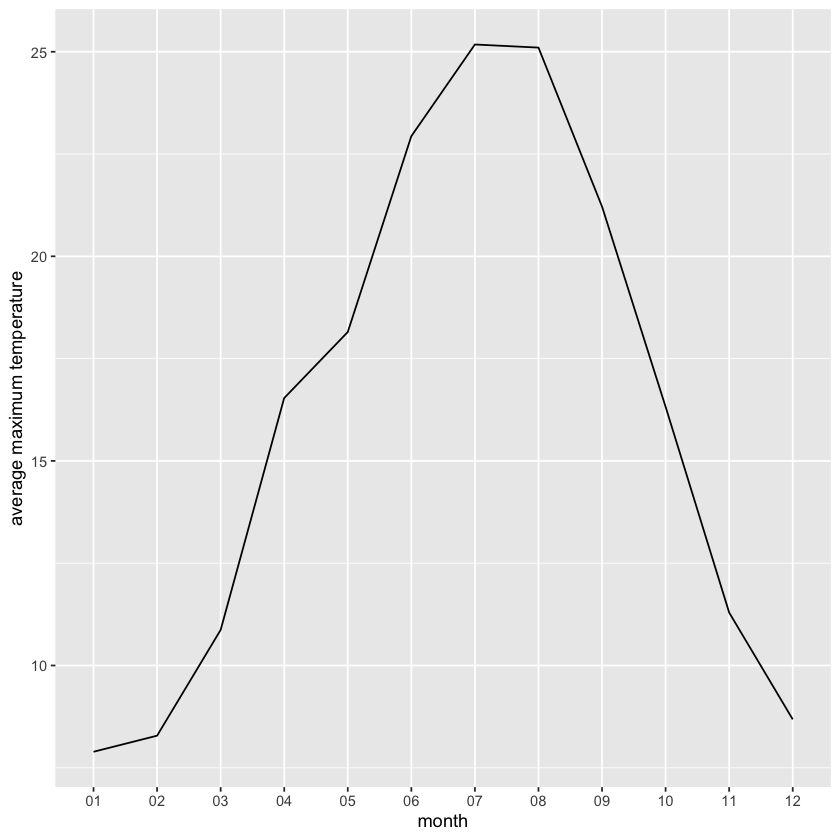

In [56]:
ggplot(monthly_mean_max_temp, aes(x = month, y =temperature_max, group =1)) +  geom_line()  + labs(x= "month", y= "average maximum temperature")

Create a new dataset `hourly_temp` using the `group_by()` and `summarise()` commands. The new dataset should contain the average mean temperature for each hour. It should have 24 rows and two variables - `hour` and `mean_temperature`. **(2 points)**

In [61]:
hourly_temp <- weather_temp
hourly_mean_temp<- hourly_temp  %>% 
    group_by(hour)  %>% 
    summarise(temperature_mean = mean(temperature_mean))

hourly_mean_temp 

hour,temperature_mean
<chr>,<dbl>
0000,11.316697
0100,10.881870
0200,10.531542
0300,10.142591
0400,9.811660
0500,9.560383
0600,9.509781
0700,9.854270
0800,10.675766


Use the `ggplot()` command on your newly created `hourly_temp` summarized dataset to reproduce the second plot above. The x axis should show the time of day (hour), and the y axis should show the average mean temperature for each time of day. **(2 points)**

In [62]:
hourly_mean_temp$hour <- as.numeric (hourly_mean_temp$hour)
str(hourly_mean_temp)

tibble [24 × 2] (S3: tbl_df/tbl/data.frame)
 $ hour            : num [1:24] 0 100 200 300 400 500 600 700 800 900 ...
 $ temperature_mean: num [1:24] 11.32 10.88 10.53 10.14 9.81 ...


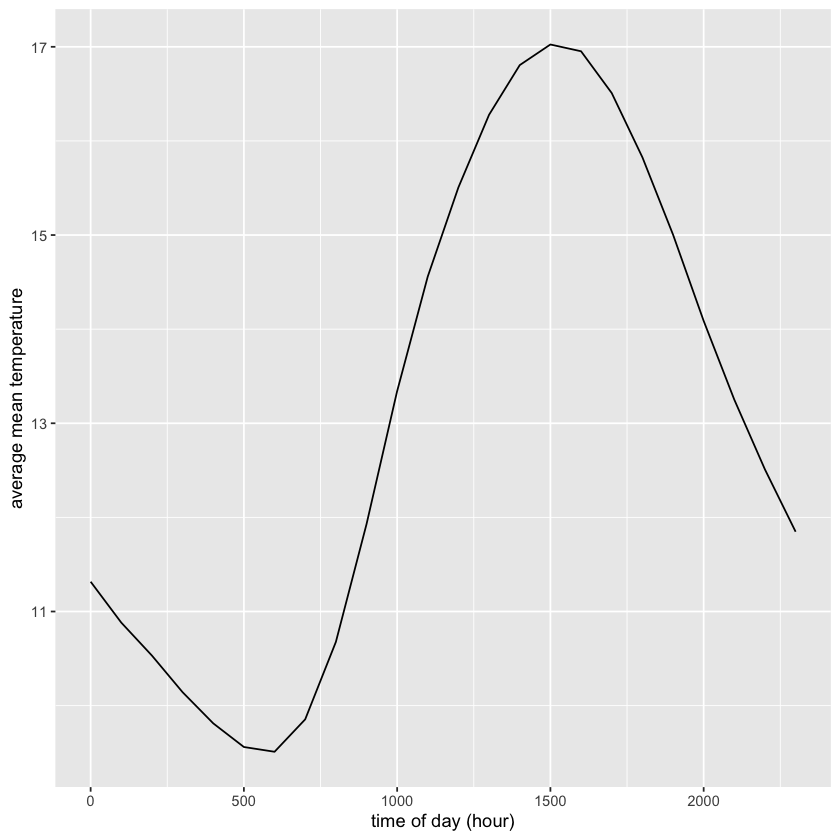

In [64]:
ggplot(hourly_mean_temp, aes(x = hour, y = temperature_mean,  group =1)) + geom_line() + labs(x = "time of day (hour)", y = "average mean temperature")
 